# 次日留存预测模型

## 总体思路

a.1 数据来源（基于帝国二测玩家首日表现（拉取尽可能多的特征））；

a.2 数据清洗与格式转换；

b 探索性数据分析；

c 特征筛选；

d 特征工程；

e 建立多种基础模型，尝试多种算法；

f 模型调参/提升模型；

g 评估测试/结论汇报。

## 实现过程

### 数据来源（基于帝国二测玩家首日表现（拉取尽可能多的特征））

基于SQL查询，放入至：E:\python_moudle\data\diguo_lc_data.csv

### 数据清洗与格式转换 

In [1]:
import warnings
warnings.filterwarnings('ignore') #忽视
import numpy as np

In [2]:
import pandas as pd
data_lc = pd.read_csv(r"E:\python_moudle\data\diguo_lc_data.csv")

In [3]:
data_lc.describe()

,serverid,roleid,first_time,first_pay_amount,first_pay_level,level,vip_level,exp,total_play_time,td,cs_zs,sfcl
count,11514.000000,11514.000000,11514.000000,11514.000000,586.000000,11514.000000,11514.000000,11514.000000,11514.000000,11514.000000,11514.000000,11514.000000
mean,13.191506,133934.396561,55092.071131,0.704099,10.230375,7.254647,0.069133,26510.896648,42.227202,0.224336,12.530919,0.179868
std,0.789641,8407.304281,15592.569297,8.700698,7.065009,7.464205,0.360348,65809.016320,77.260409,0.766579,21.434975,0.384094
min,12.000000,120000.000000,16.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000
25%,13.000000,130180.250000,48261.500000,0.000000,4.000000,2.000000,0.000000,1647.000000,3.000000,0.000000,2.000000,0.000000
50%,13.000000,133058.500000,55460.000000,0.000000,9.000000,4.000000,0.000000,2398.500000,12.000000,0.000000,4.000000,0.000000
75%,14.000000,142011.750000,65118.750000,0.000000,14.000000,10.000000,0.000000,12715.500000,39.000000,0.000000,12.000000,0.000000
max,14.000000,144890.000000,86397.000000,328.000000,29.000000,36.000000,7.000000,965002.000000,846.000000,8.000000,263.000000,1.000000


In [4]:
data_lc = data_lc.drop(["serverid", "roleid", "role_name", "first_date"], axis=1)

In [5]:
data_lc["first_pay_level"]=data_lc["first_pay_level"].fillna(0)

In [6]:
data_lc['first_day_pay'] = data_lc['first_day_pay'].map(lambda x:x.replace(',', '')).astype(float)

### 探索性数据分析

In [7]:
import plotly 
import chart_studio
import pandas as pd
import plotly_express as px
chart_studio.tools.set_credentials_file(username='chongxuan', api_key='RUflWbQJ49ZmvqmpjLcy')
chart_studio.tools.set_config_file(world_readable=True,sharing='public')
import plotly.graph_objects as go

In [8]:
fig = px.line(data_lc,x=data_lc["first_time"],y=data_lc["sfcl"])

In [9]:
plotly.offline.plot(fig,filename=r'C:\Users\Administrator\Desktop\次留模型.html')

'C:\\Users\\Administrator\\Desktop\\次留模型.html'

先行略过

### 特征筛选

先行略过

### 特征工程

In [16]:
Y = np.array(data_lc["sfcl"])

In [19]:
X = data_lc.iloc[:,:-1]
X = X.as_matrix().astype(np.float) # 所有特征转化为np.float

In [20]:
from sklearn.preprocessing import StandardScaler #标准化库

scaler = StandardScaler() #标准化

X = scaler.fit_transform(X)

KNN: 0.871374 (0.003595)
-------------------------
NB: 0.872589 (0.005991)
-------------------------
LR: 0.879016 (0.006299)
-------------------------
RF: 0.873285 (0.002656)
-------------------------
GBC: 0.883446 (0.003527)
-------------------------


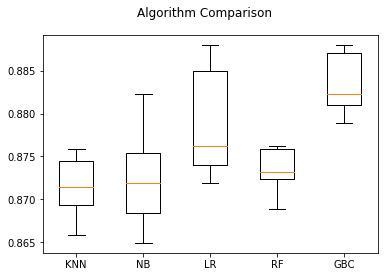

In [31]:
#调入工具包
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 初始化模型
models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('LR',LogisticRegression()))
models.append(('RF',RandomForestClassifier()))
models.append(('GBC',GradientBoostingClassifier()))


# 初始化
results = []
names = []
scoring = 'accuracy' # 准确率
for name, model in models:
    kfold = KFold(5, shuffle=True, random_state = 0)
    cv_results = cross_val_score(model, X, Y, cv=kfold)
    results.append(cv_results) # 交叉验证给的结果分
    names.append(name)
    # 模型的标准差，体现模型的分值波动，std越小越稳定
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
    print("-------------------------")
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.8736198595424269


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 30
kfold = KFold(n_splits=10, random_state=seed)

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.8779636065257265


In [35]:
from sklearn.ensemble import RandomForestClassifier as RF
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RF(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8727517285693599


In [15]:
#提供了数据预处理的库
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
print ("Feature space holds %d observations and %d features" % X.shape)

Feature space holds 11514 observations and 10 features


In [99]:
print ("Unique target labels:", np.unique(y))

Unique target labels: [0 1]


In [100]:
print( X[0])

[-3.53235326 -0.08092798 -0.18897161 -0.05552466  1.30566842 -0.19185968
  0.86861328  0.73485585  1.0118956   0.86167041]


In [101]:
print (len(y[y == 0]))

9443


In [110]:
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import KFold

In [114]:
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    #做成几份交叉验证
    kf = KFold(len(y),shuffle=True)
    y_pred = y.copy()
 
    # 分成了几份做交叉验证循环
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # 分类器的类型
        clf = clf_class(**kwargs)
        #放入训练集
        clf.fit(X_train,y_train)
        #预测
        y_pred[test_index] = clf.predict(X_test)
        #返回预测值
    return y_pred

In [115]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
#定义了一个精确函数，比较真实值和预测值，返回均值
def accuracy(y_true,y_pred):
    #返回的是0,1值，表示预测是否正确的指标
    #NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)
 
 
#精确度很高并不能判定模型的优越性，最终想要的目标是检测出来流失的，主要看召回率
#而召回率主要是把实际上是真的判断成的真真和真假的占比
# print("Support vector machines:")
print('支持向量机')
print( "%.3f" % accuracy(y, run_cv(X,y,SVC)))
# print("Random forest:") 
print('随机森林')
print("%.3f" % accuracy(y, run_cv(X,y,RF))) 
print('K近邻算法')
print("%.3f" % accuracy(y, run_cv(X,y,KNN)))

支持向量机


TypeError: 'KFold' object is not iterable

In [113]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  KFold(n_splits='warn', shuffle=False, random_state=None)
 |  
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.20
 |          ``n_splits`` default value will change from 3 to 5 in v0.22.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If R

In [44]:
scaler.fit_transform([0,1,1,0])

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.